# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [114]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [116]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 591


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [118]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({
            "City": city,
            "Lat": city_lat,
            "Lng": city_lng,
            "Max Temp": city_max_temp,
            "Humidity": city_humidity,
            "Cloudiness": city_clouds,
            "Wind Speed": city_wind,
            "Country": city_country,
            "Date": city_date
        })

    # If an error is experienced, skip the city
    except Exception as e:
        print(f"City not found. Skipping... {e}")
        pass

    # Pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | palora
Processing Record 2 of Set 1 | vingt cinq
City not found. Skipping... 'coord'
Processing Record 3 of Set 1 | port-aux-francais
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | grytviken
Processing Record 6 of Set 1 | port elizabeth
Processing Record 7 of Set 1 | bel ombre
Processing Record 8 of Set 1 | adamstown
Processing Record 9 of Set 1 | blackmans bay
Processing Record 10 of Set 1 | hawaiian paradise park
Processing Record 11 of Set 1 | vadso
Processing Record 12 of Set 1 | bethel
Processing Record 13 of Set 1 | bredasdorp
Processing Record 14 of Set 1 | nuku'alofa
Processing Record 15 of Set 1 | happy valley-goose bay
Processing Record 16 of Set 1 | iqaluit
Processing Record 17 of Set 1 | vilyuysk
Processing Record 18 of Set 1 | hamilton
Processing Record 19 of Set 1 | edinburgh of the seven seas
Processing Record 20 of Set 1 | gebeit
Processing Record 21 of Set 

In [120]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          563
Lat           563
Lng           563
Max Temp      563
Humidity      563
Cloudiness    563
Wind Speed    563
Country       563
Date          563
dtype: int64

In [122]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,palora,-1.7000,-77.9333,29.94,40,8,2.43,EC,1723145323
1,port-aux-francais,-49.3500,70.2167,1.57,74,98,9.70,TF,1723145326
2,ushuaia,-54.8000,-68.3000,5.81,75,20,0.51,AR,1723145327
3,grytviken,-54.2811,-36.5092,-11.14,74,17,6.58,GS,1723145328
4,port elizabeth,-33.9180,25.5701,14.62,90,0,3.60,ZA,1723145329


In [126]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [128]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,palora,-1.7000,-77.9333,29.94,40,8,2.43,EC,1723145323
1,port-aux-francais,-49.3500,70.2167,1.57,74,98,9.70,TF,1723145326
2,ushuaia,-54.8000,-68.3000,5.81,75,20,0.51,AR,1723145327
3,grytviken,-54.2811,-36.5092,-11.14,74,17,6.58,GS,1723145328
4,port elizabeth,-33.9180,25.5701,14.62,90,0,3.60,ZA,1723145329


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

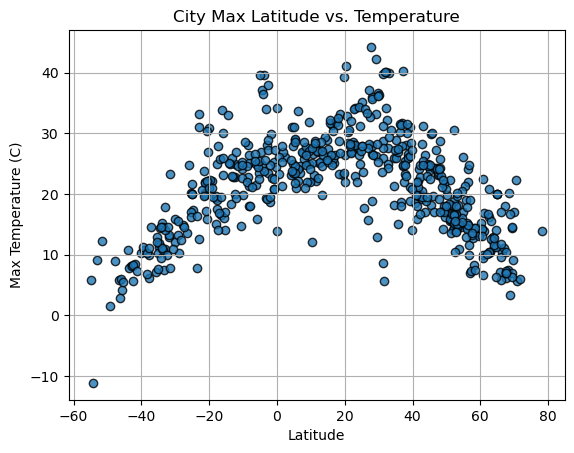

In [132]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black", linewidths=1, marker="o", alpha=0.8)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

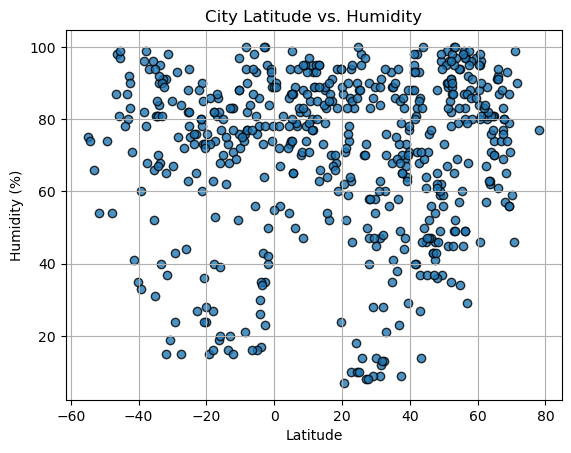

In [134]:
# Build the scatter plot for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black", linewidths=1, marker="o", alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

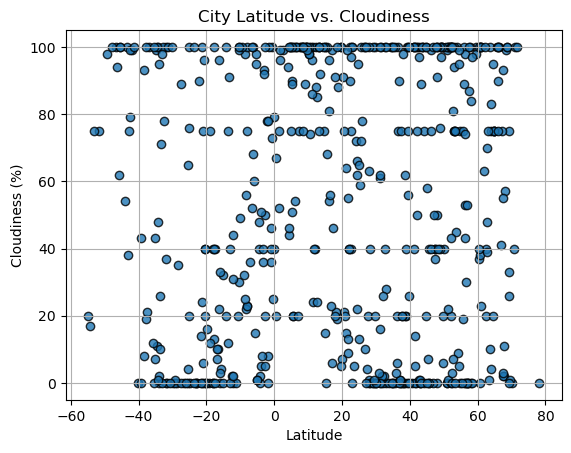

In [136]:
# Build the scatter plot for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black", linewidths=1, marker="o", alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

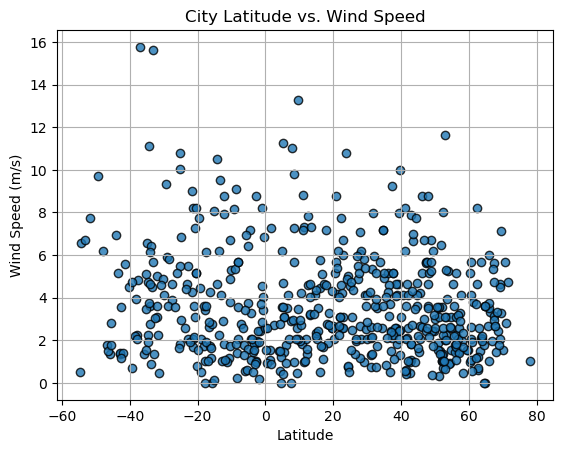

In [138]:
# Build the scatter plot for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black", linewidths=1, marker="o", alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [140]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, xlabel, ylabel, plot_filename):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    # Get regression line values
    regress_values = x_values * slope + intercept

# Create scatter plot
    plt.scatter(x_values, y_values, linewidths=1, marker="o", alpha=0.8)
 # Plot regression line
    plt.plot(x_values, regress_values, "r-", label=f'y = {slope:.2f}x + {intercept:.2f}')   
    # Incorporate the other graph properties
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
   
    # Annotate equation
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
    plt.annotate(line_eq, (x_values.min() + 1, y_values.min() + 1), fontsize=15, color="red")
    
    # Save the figure
    plt.savefig(f"output_data/{plot_filename}")
    
    # Show plot
    plt.show()
       
    # Print the R-squared value
    print(f"The r^2-value is: {rvalue**2}")

In [142]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
8,hawaiian paradise park,19.5933,-154.9731,23.18,94,100,2.57,US,1723145333
9,vadso,70.0744,29.7487,17.09,59,0,1.54,NO,1723145334
10,bethel,41.3712,-73.4140,20.05,95,100,3.60,US,1723145335
13,happy valley-goose bay,53.3168,-60.3315,18.17,52,75,3.09,CA,1723145338
14,iqaluit,63.7506,-68.5145,12.85,62,100,5.66,CA,1723145339


In [144]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,palora,-1.7000,-77.9333,29.94,40,8,2.43,EC,1723145323
1,port-aux-francais,-49.3500,70.2167,1.57,74,98,9.70,TF,1723145326
2,ushuaia,-54.8000,-68.3000,5.81,75,20,0.51,AR,1723145327
3,grytviken,-54.2811,-36.5092,-11.14,74,17,6.58,GS,1723145328
4,port elizabeth,-33.9180,25.5701,14.62,90,0,3.60,ZA,1723145329


###  Temperature vs. Latitude Linear Regression Plot

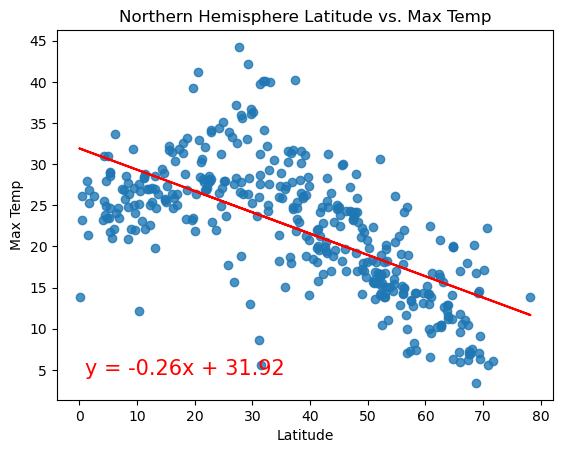

The r^2-value is: 0.4273302047038963


In [146]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"],
                       "Northern Hemisphere Latitude vs. Max Temp", "Latitude", "Max Temp", "Fig5.png")

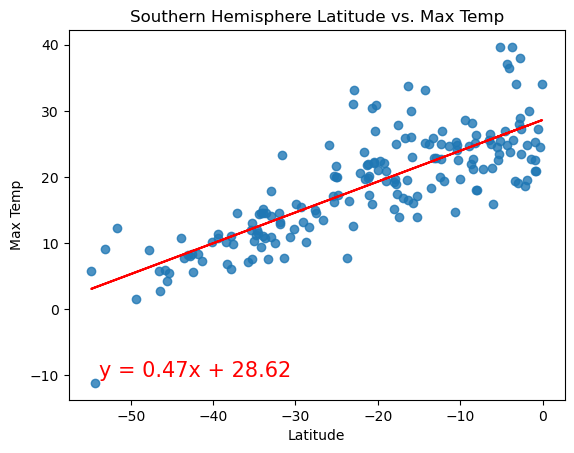

The r^2-value is: 0.6417385720681675


In [148]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"],
                       "Southern Hemisphere Latitude vs. Max Temp", "Latitude", "Max Temp", "Fig6.png")

**Discussion about the linear relationship:** 
Northern Hemisphere: The farther north you go, the cooler it gets.
Southern Hemisphere: The closer you get to the equator, the warmer it gets.
There’s a clear correlation between temperature and latitude. As expected, temperatures increase as you move closer to the equator.

### Humidity vs. Latitude Linear Regression Plot

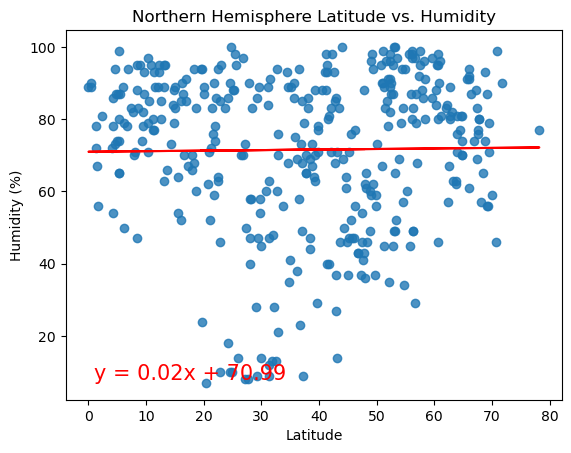

The r^2-value is: 0.00018070290239939415


In [150]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"],
                       "Northern Hemisphere Latitude vs. Humidity", "Latitude", "Humidity (%)", "Fig7.png")

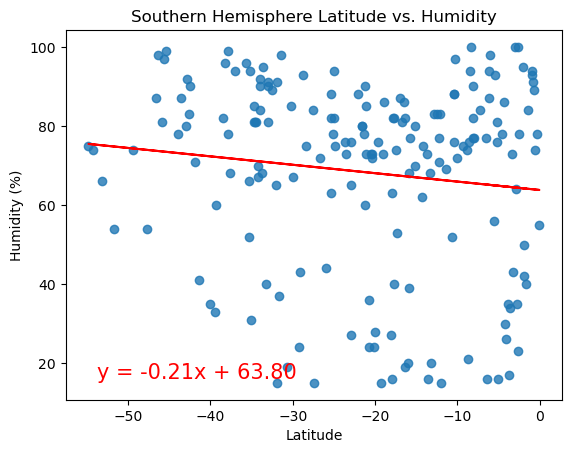

The r^2-value is: 0.015254346899735573


In [152]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"],
                       "Southern Hemisphere Latitude vs. Humidity", "Latitude", "Humidity (%)", "Fig8.png")

**Discussion about the linear relationship:** No strong relationship, but there’s a slight trend of higher humidity in the northern hemisphere.
In both hemispheres, humidity is likely influenced more by local environmental conditions than by latitude.

### Cloudiness vs. Latitude Linear Regression Plot

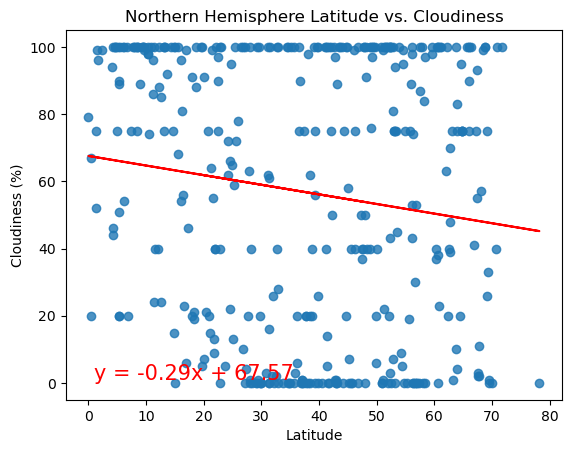

The r^2-value is: 0.019288745345219464


In [154]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"],
                       "Northern Hemisphere Latitude vs. Cloudiness", "Latitude", "Cloudiness (%)", "Fig9.png")

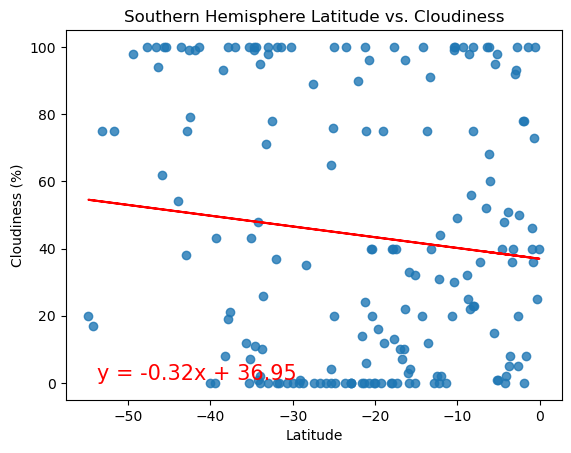

The r^2-value is: 0.013191275722614904


In [158]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"],
                       "Southern Hemisphere Latitude vs. Cloudiness", "Latitude", "Cloudiness (%)", "Fig10.png")

**Discussion about the linear relationship:** Both hemispheres exhibit a slight negative relationship between latitude and cloudiness, with the Southern Hemisphere showing a marginally stronger trend.
The weak linear relationships suggest that latitude alone does not significantly determine cloudiness levels.

### Wind Speed vs. Latitude Linear Regression Plot

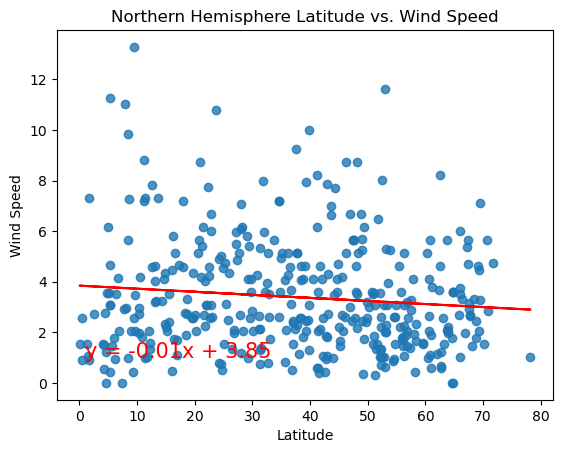

The r^2-value is: 0.011281285649211511


In [160]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"],
                       "Northern Hemisphere Latitude vs. Wind Speed", "Latitude", "Wind Speed", "Fig11.png")

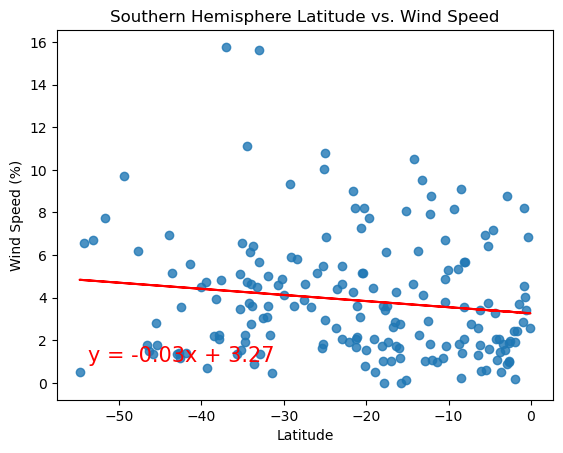

The r^2-value is: 0.020216492982940353


In [162]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"],
                       "Southern Hemisphere Latitude vs. Wind Speed", "Latitude", "Wind Speed (%)", "Fig12.png")

**Discussion about the linear relationship:** Northern Hemisphere: Shows a very weak positive relationship between latitude and wind speed, indicating that wind speed increases slightly with latitude.
Southern Hemisphere: Shows a weak negative relationship between latitude and wind speed, indicating that wind speed decreases slightly with latitude.